In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score
import xgboost as xgb
import time
import random as rnd
import matplotlib.pyplot as plt

standarscaler = StandardScaler()

import warnings
warnings.filterwarnings("ignore")

In [38]:
TrainData = pd.read_csv('count_train.csv')
X = TrainData.drop('yC', axis = 1)
Y = TrainData['yC']

Xs = standarscaler.fit_transform(X)
Xs = pd.DataFrame(Xs, index=X.index, columns=X.columns.values)

In [39]:
TestData = pd.read_csv('count_test.csv')
Xt = TestData.drop('yC', axis = 1)
Yt = TestData['yC']

Xts = standarscaler.transform(Xt)
Xts = pd.DataFrame(Xts, index=Xt.index, columns=Xt.columns.values)

In [40]:
data_dmatrix = xgb.DMatrix(data=XTS,label=YT)
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

In [41]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

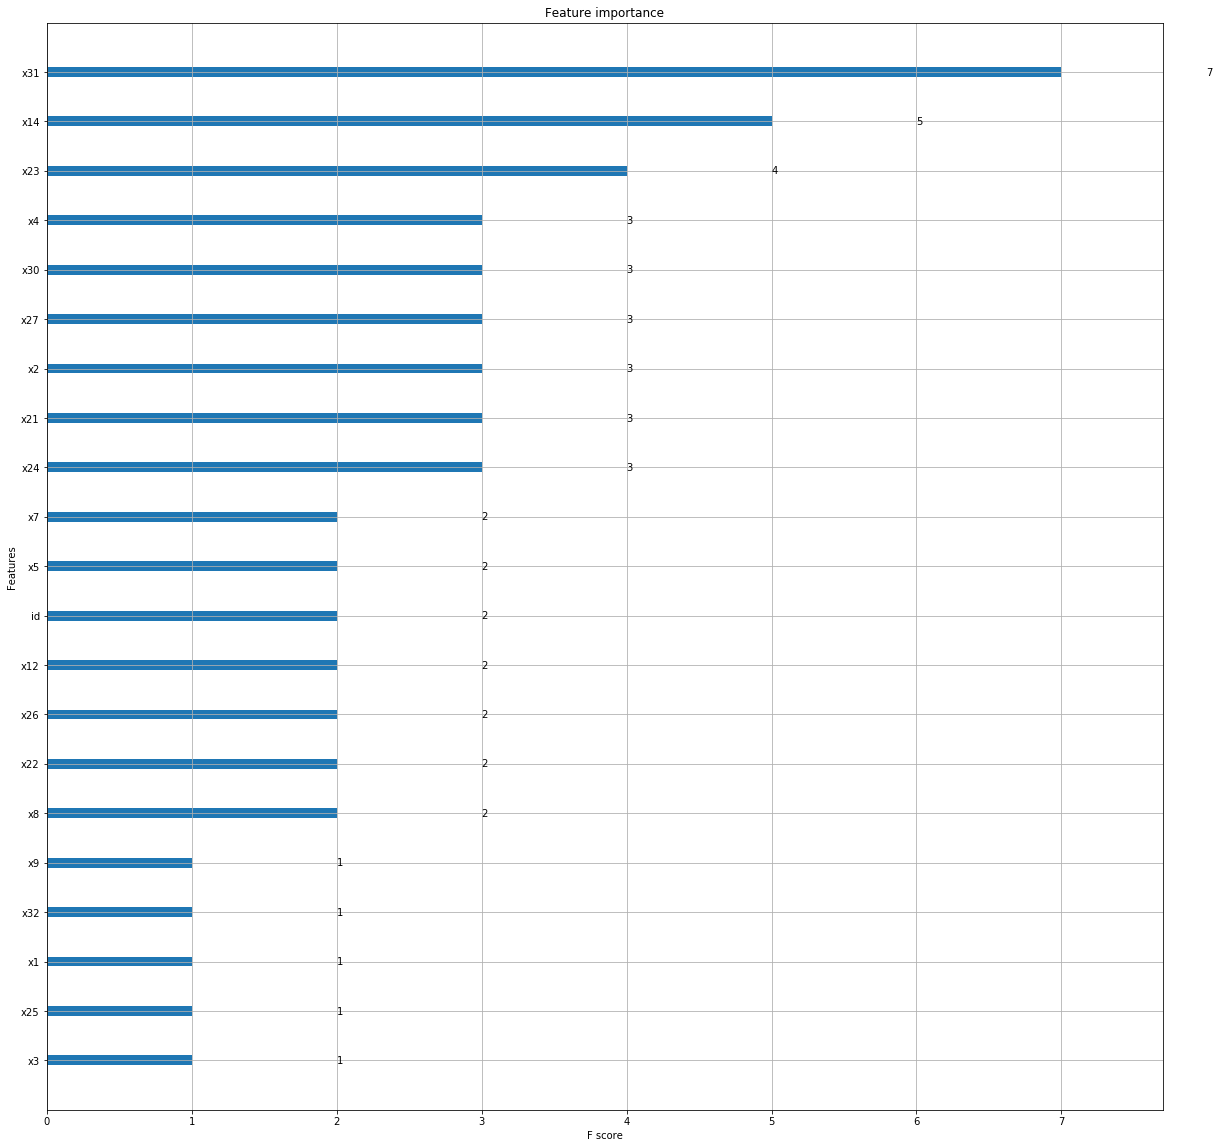

In [42]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [44]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(Xs[['x31', 'x14', 'x23', 'x4', 'x30', 'x27', 'x2', 'x21', 'x24']],Y)
preds = xg_reg.predict(Xts[['x31', 'x14', 'x23', 'x4', 'x30', 'x27', 'x2', 'x21', 'x24']])
np.sqrt(mean_squared_error(Yt, np.round(preds)))

1.622754859285078